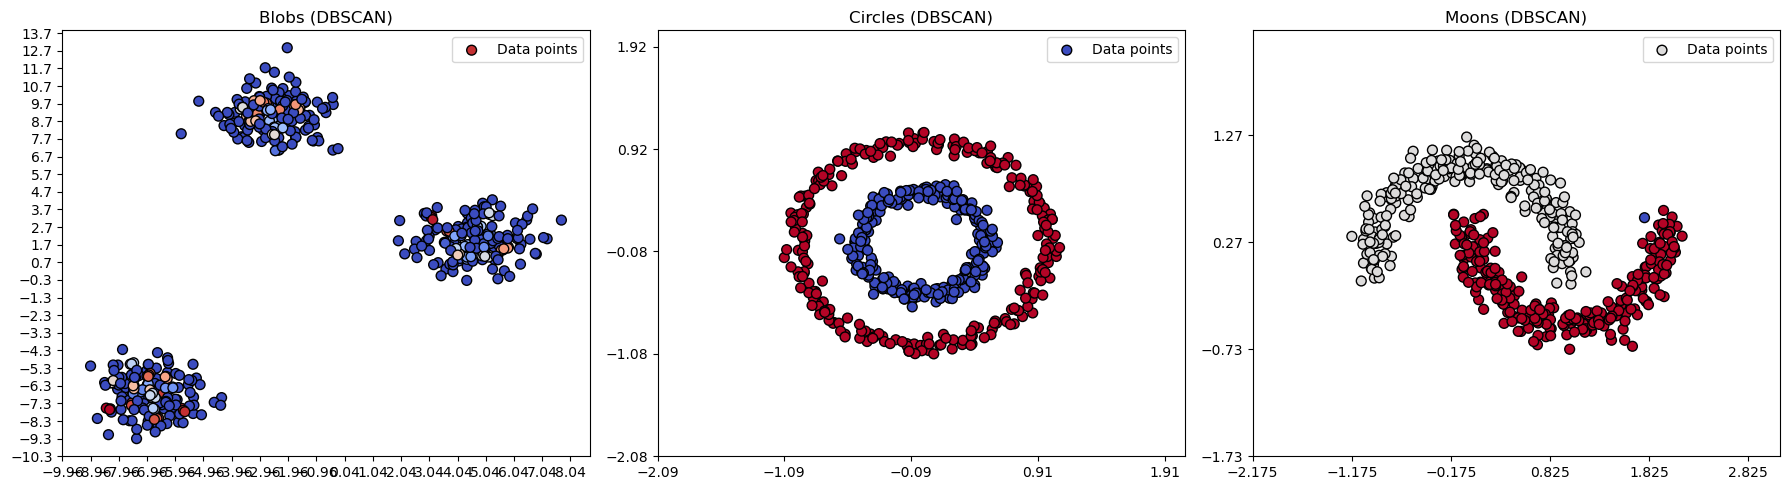

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import DBSCAN

# Generar diferentes conjuntos de datos
n_samples = 500

# Dataset 1: Blobs
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=42)

# Dataset 2: Círculos
X_circles, y_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Dataset 3: Lunas
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.1)

# Lista de datasets para iterar
datasets = [(X_blobs, "Blobs"), (X_circles, "Circles"), (X_moons, "Moons")]

# Crear la figura para mostrar los resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (X, title) in enumerate(datasets):
    # Crear e implementar el modelo DBSCAN
    dbscan = DBSCAN(eps=0.15, min_samples=3)
    y_pred = dbscan.fit_predict(X)
    
    # Crear una malla de puntos para visualizar las fronteras de los clusters
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # No se pueden predecir fronteras claras con DBSCAN, pero se visualizan los puntos originales
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor='k', s=50, cmap=plt.cm.coolwarm, label='Data points')
    
    ax.set_title(f"{title} (DBSCAN)")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(np.arange(x_min, x_max, 1.0))  
    ax.set_yticks(np.arange(y_min, y_max, 1.0)) 
    ax.legend()

plt.tight_layout()
plt.show()
